In [64]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [65]:
cab_data = pd.read_csv('/cab_rides.csv')
weather_data = pd.read_csv('/weather.csv')

In [66]:
cab_data.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [67]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [68]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,16405.000000,1.640500e+04,15111.000000,16405.000000
mean,2.151143,1.544031e+12,16.406194,1.014736
std,1.120357,6.876294e+08,9.201755,0.093571
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.260000,1.543439e+12,9.000000,1.000000
50%,2.080000,1.543721e+12,13.500000,1.000000
75%,2.860000,1.544813e+12,22.500000,1.000000
max,7.460000,1.545161e+12,80.000000,2.500000


In [69]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16405 entries, 0 to 16404
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          16405 non-null  float64
 1   cab_type          16405 non-null  object 
 2   time_stamp        16405 non-null  int64  
 3   destination       16405 non-null  object 
 4   source            16405 non-null  object 
 5   price             15111 non-null  float64
 6   surge_multiplier  16405 non-null  float64
 7   id                16405 non-null  object 
 8   product_id        16405 non-null  object 
 9   name              16405 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [70]:
import datetime
cab_data['time_stamp'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['time_stamp'] = pd.to_datetime(weather_data['time_stamp'])
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1970-01-01 00:00:01.545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1970-01-01 00:00:01.545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1970-01-01 00:00:01.545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1970-01-01 00:00:01.545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1970-01-01 00:00:01.545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1970-01-01 00:00:01.543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1970-01-01 00:00:01.543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1970-01-01 00:00:01.543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1970-01-01 00:00:01.543819974,0.96,1.54


In [71]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [72]:
cab_data.shape

(16405, 10)

In [73]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [74]:
weather_data.shape

(6276, 8)

In [75]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6276,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1970-01-01 00:00:01.543857377,0.763985,6.802812
min,19.620000,0.000000,988.250000,0.000200,1970-01-01 00:00:01.543203644,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1970-01-01 00:00:01.543386870,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1970-01-01 00:00:01.543513974,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1970-01-01 00:00:01.544690701,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1970-01-01 00:00:01.545158702,0.990000,18.180000
std,6.022055,0.314284,12.870775,0.100758,NaN,0.127340,3.633466


In [76]:
a=pd.concat([cab_data,weather_data])

In [77]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1970-01-01 00:25:44.952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44,Lyft,1970-01-01 00:25:43.284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44,Lyft,1970-01-01 00:25:43.366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1970-01-01 00:25:43.553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,1970-01-01 00:25:43.463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:

a['day']=a.time_stamp.dt.day

a['hour']=a.time_stamp.dt.hour



In [79]:
a.fillna(0,inplace =True)

In [80]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour'],
      dtype='object')

<Axes: xlabel='cab_type'>

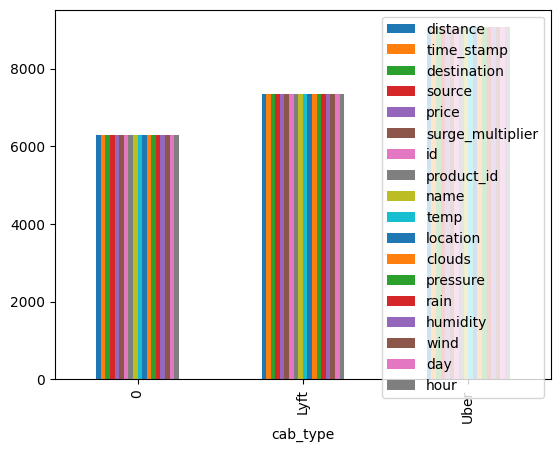

In [81]:
a.groupby('cab_type').count().plot.bar()

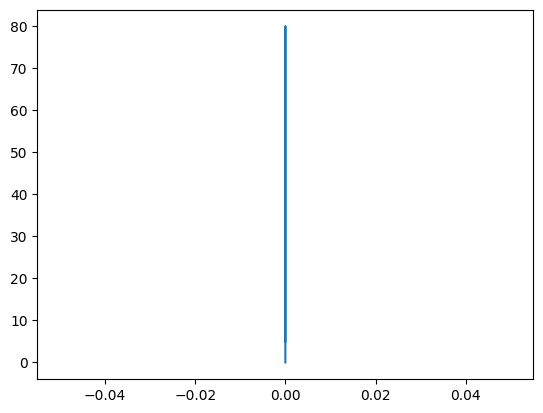

In [82]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

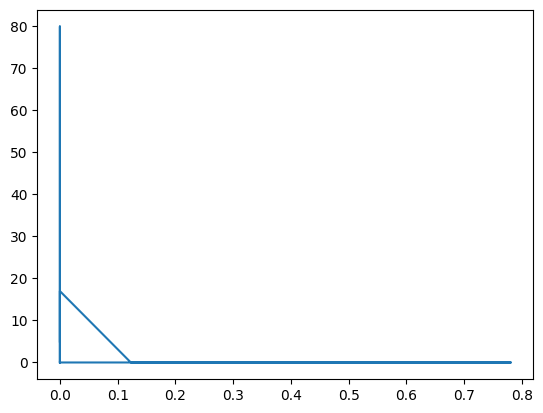

In [83]:
x = a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [84]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour'],
      dtype='object')

In [90]:
x1=a[['distance','temp', 'time_stamp','surge_multiplier','clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour']]
y1=a['price']


In [91]:
from sklearn.model_selection import train_test_split
x_train,y_train,y_test,x_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'a' is your DataFrame
# Convert 'time_stamp' to numerical representation (e.g., Unix timestamp)
a['time_stamp'] = pd.to_datetime(a['time_stamp']).astype(int) / 10**9

x1 = a[['distance','temp', 'time_stamp','surge_multiplier','clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour']]
y1 = a['price']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

linear = LinearRegression()
linear.fit(x_train, y_train)  # Correct the target variable to y_train

LinearRegression()

In [103]:

prediction = linear.predict(x_test)
prediction

array([17.49640427, 19.41695346, 14.31124363, ..., 11.51574595,
       20.67559316, 12.69150041])

In [99]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
1087,11.0,17.496404
15256,19.5,19.416953
4679,9.0,14.311244
14368,7.0,14.142395
15241,0.0,13.833324
...,...,...
129,38.5,18.407871
1378,0.0,0.003267
401,0.0,11.515746
9645,32.5,20.675593


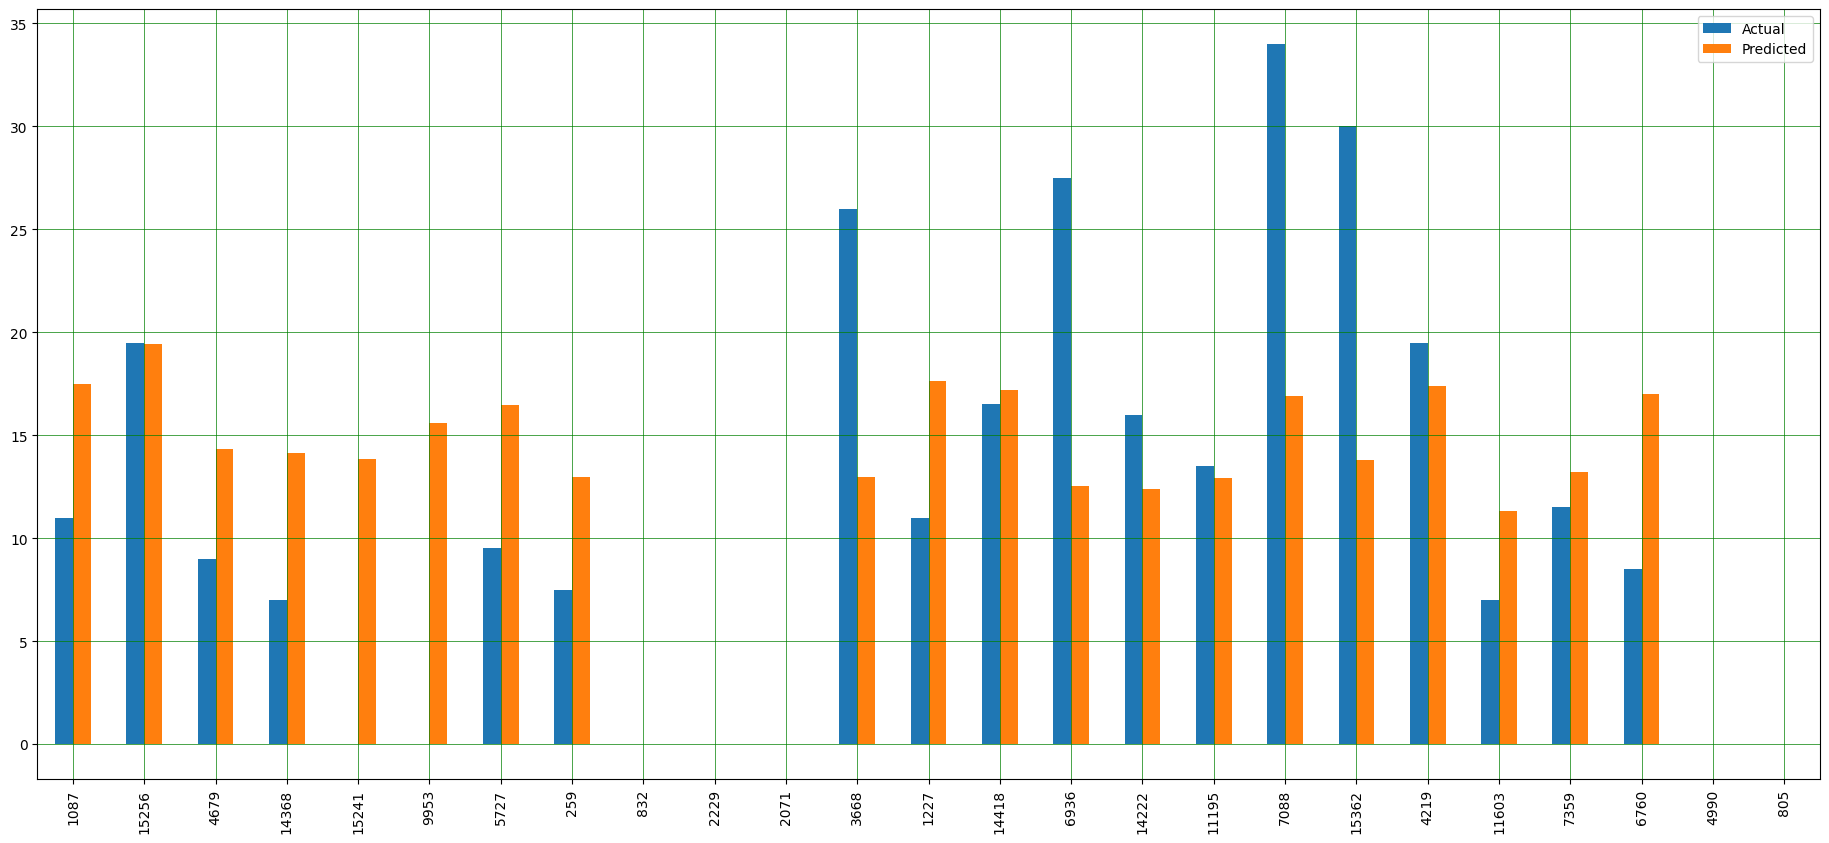

In [106]:
df1 =df.head(25)
df1.plot(kind='bar',figsize=(23,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()